# Basic Understanding of the Dataset

The goal of this jupyter notebook is to provide an initial insight into our given [dataset](../../resources/cardio_train.csv).

This dataset is taken from Kaggel and can be found [here](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).


## Imports

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The dataset

The dataset has 70 000 rows and 13 columns. There are 3 types of input features:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient

| [0] id| [1] age| [2] gender| [3] height| [4] weight|
| ---| ---| ---| ---| ---|
| int| int| 1 or 2 | int| float|
| -| days| categorical code| cm| kg |
| -| Objective| Objective| Objective| Objective |

| [5] ap_hi| [6] ap_lo| [7] cholesterol| [8] gluc|
| ---| ---| ---| ---|
| int| int| 1, 2, 3 | 1, 2, 3 |
| -| -| normal, above normal, well above normal| normal, above normal, well above normal|
| Examination| Examination| Examination| Examination|

>Note: ap_hi = Systolic blood pressure, ap_lo = Diastolic blood pressure, gluc = Glucose

| [9] smoke|| [10] alco| [11] active| [12] cardio|
| ---| ---| ---| ---|
| binary| binary| binary| binary |
| -| -| -| categorical code|
| Subjective| Subjective| Subjective| Target|

>Note: alco = Alcohol intake


In [22]:
data:pd.DataFrame = pd.read_csv('../resources/cardio_train.csv', sep=';')
data
# gender_classes = data.gender.unique()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Having a cardiovascular disease

How do the input feature correlate with having a cardiovascular disease?

### Age

Text(0.5, 1.0, 'counting cardio by age')

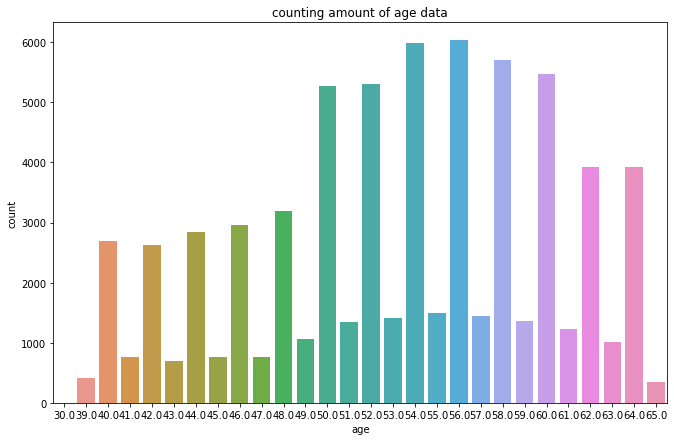

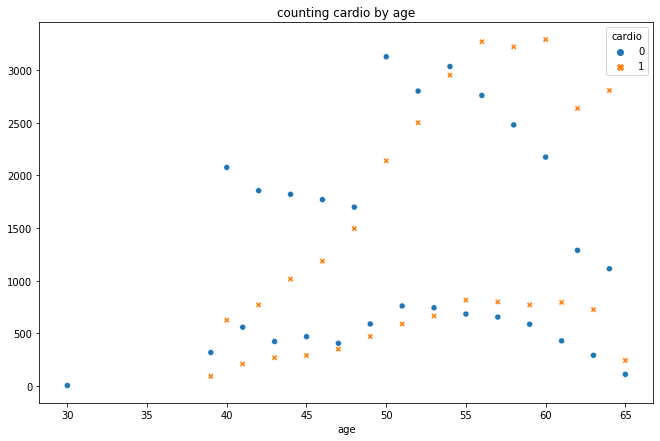

In [23]:
# take age & round days to years
age = data.age
age_divider = 1/365
age = round(age * age_divider)

# create age data in correlation with cardio
age_data = pd.concat([age, data.cardio], axis=1, join='inner')

# count all cases for age and cardio
age_data['sum'] = 0
plot_data = age_data.groupby(['age','cardio'])['sum'].count().unstack()

# plot the results
fig_age_a, bar_age_a = plt.subplots(figsize = (11,7))
bar_age_a = sns.countplot(x='age',data=age_data)
bar_age_a.set_title('counting amount of age data')

fig_age_b, bar_age_b = plt.subplots(figsize = (11,7))
bar_age_b = sns.scatterplot(data=plot_data)
bar_age_b.set_title('counting cardio by age')


### Gender

Text(0.5, 1.0, 'counting cardio by gender')

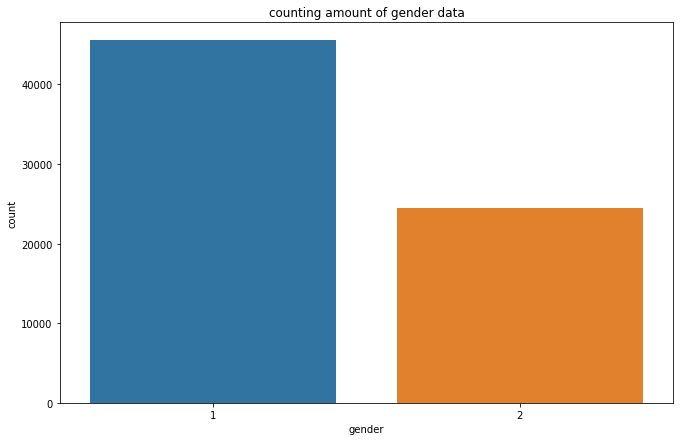

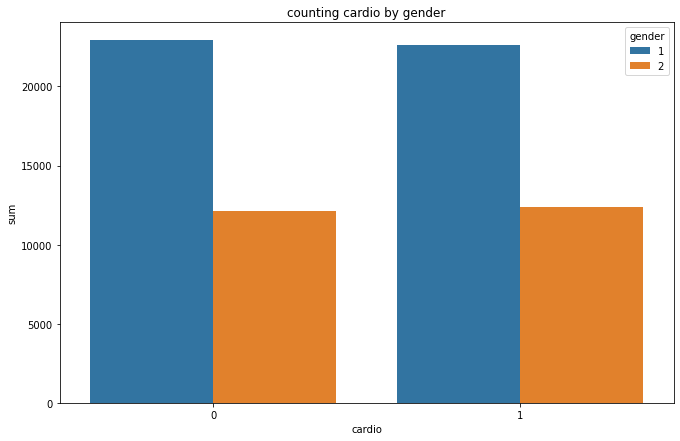

In [24]:
# create gender data in correlation with cardio
gender_data = pd.concat([data.gender, data.cardio], axis=1, join='inner')

# count data and remap gender
gender_data['sum'] = 0
group_data:pd.DataFrame = gender_data.groupby(['gender','cardio'])['sum'].count().unstack()
a, b = group_data.values # not sure if male and female is mapped correctly ?
plot_data = pd.DataFrame({'gender':[1,1,2,2], 'cardio':[0,1,0,1], 'sum':[a[0],a[1], b[0], b[1]]})

# plot the result
fig_gender_a, bar_gender_a = plt.subplots(figsize = (11,7))
bar_gender_a = sns.countplot(x='gender',data=gender_data)
bar_gender_a.set_title('counting amount of gender data')

fig_gender_b, bar_gender_b = plt.subplots(figsize = (11,7))
bar_gender_b = sns.barplot(x='cardio',y='sum', hue='gender', data=plot_data)
bar_gender_b.set_title('counting cardio by gender')

### Height

Text(0.5, 1.0, 'counting cardio by height')

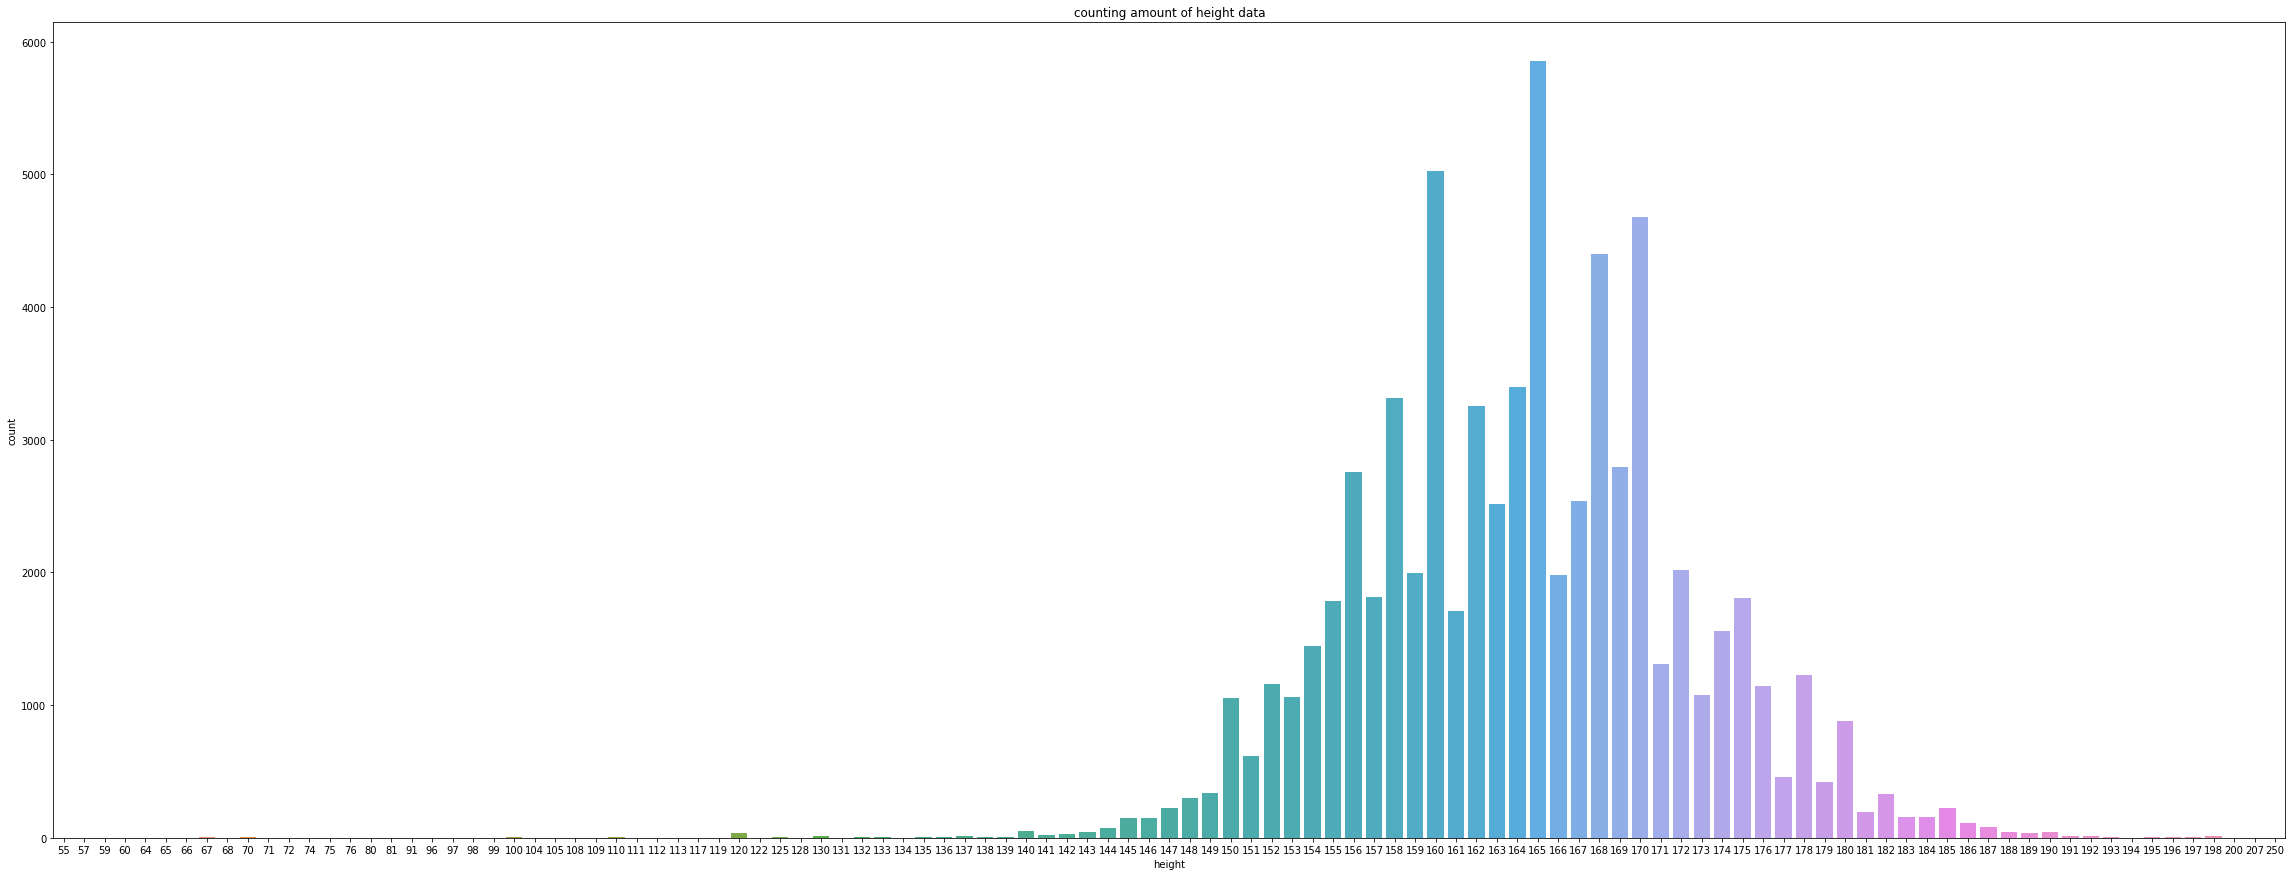

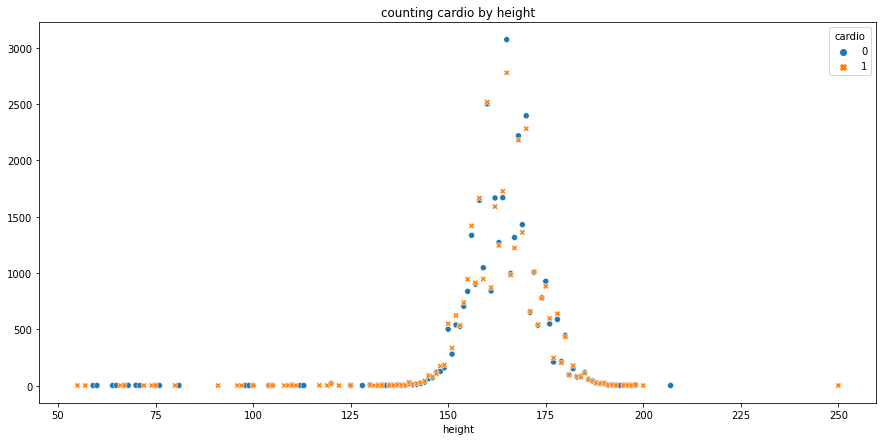

In [25]:
# create height data in correlation with cardio
height_data = pd.concat([data.height, data.cardio], axis=1, join='inner')

# count all cases for height and cardio
height_data['sum'] = 0
plot_data = height_data.groupby(['height','cardio'])['sum'].count().unstack()

# plot the results
fig_height_a, bar_height_a = plt.subplots(figsize = (40,15))
bar_height_a = sns.countplot(x='height',data=height_data)
bar_height_a.set_title('counting amount of height data')

fig_height_b, bar_height_b = plt.subplots(figsize = (15,7))
bar_height_b = sns.scatterplot(data=plot_data)
bar_height_b.set_title('counting cardio by height')

### Weight

Text(0.5, 1.0, 'counting cardio by weight')

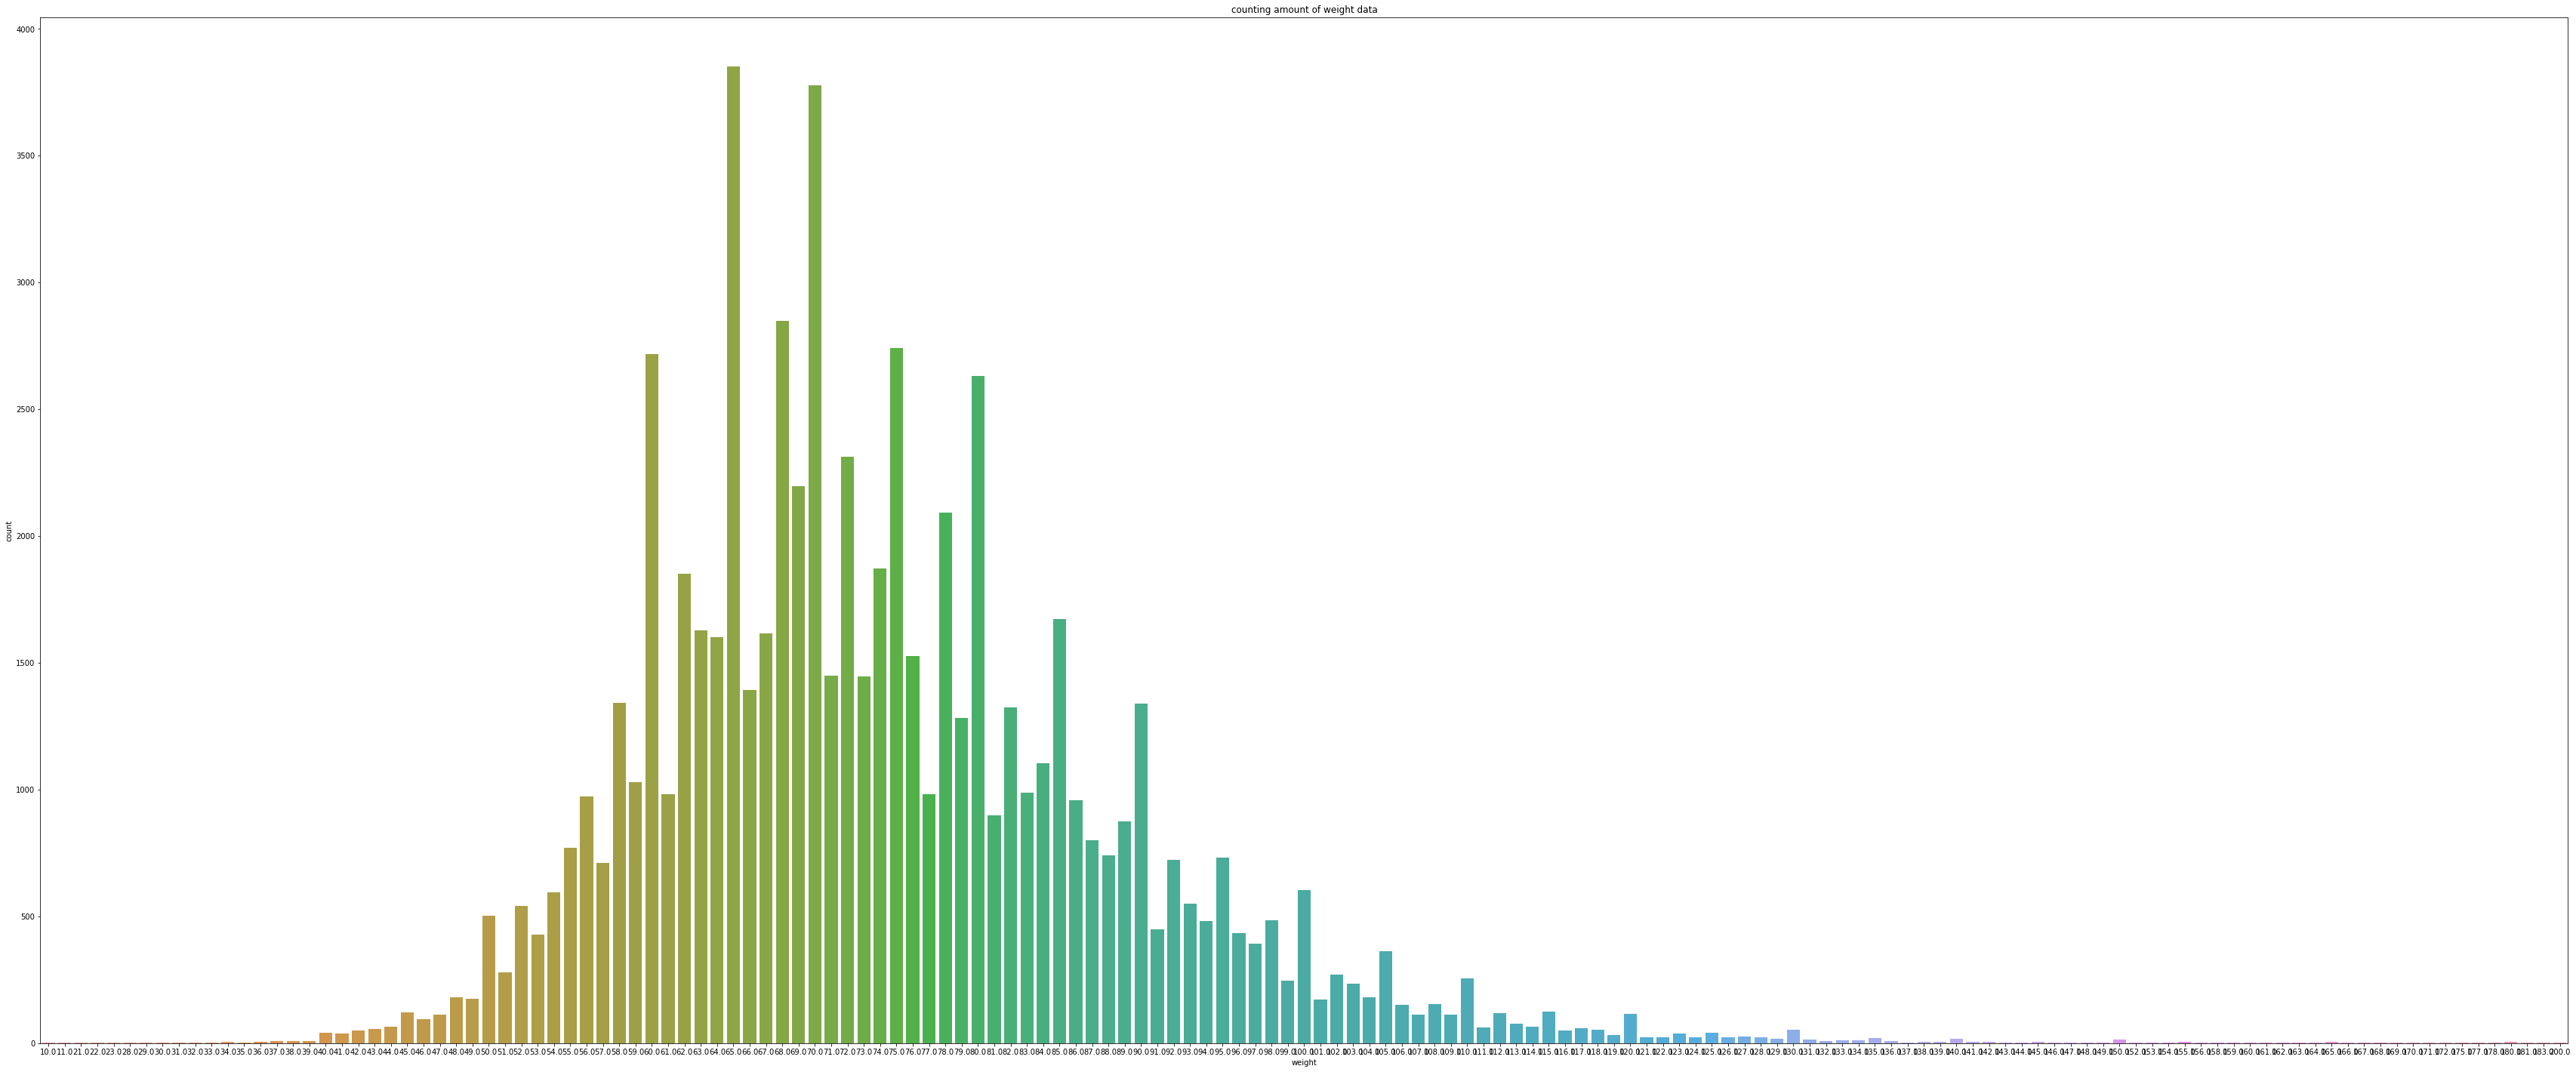

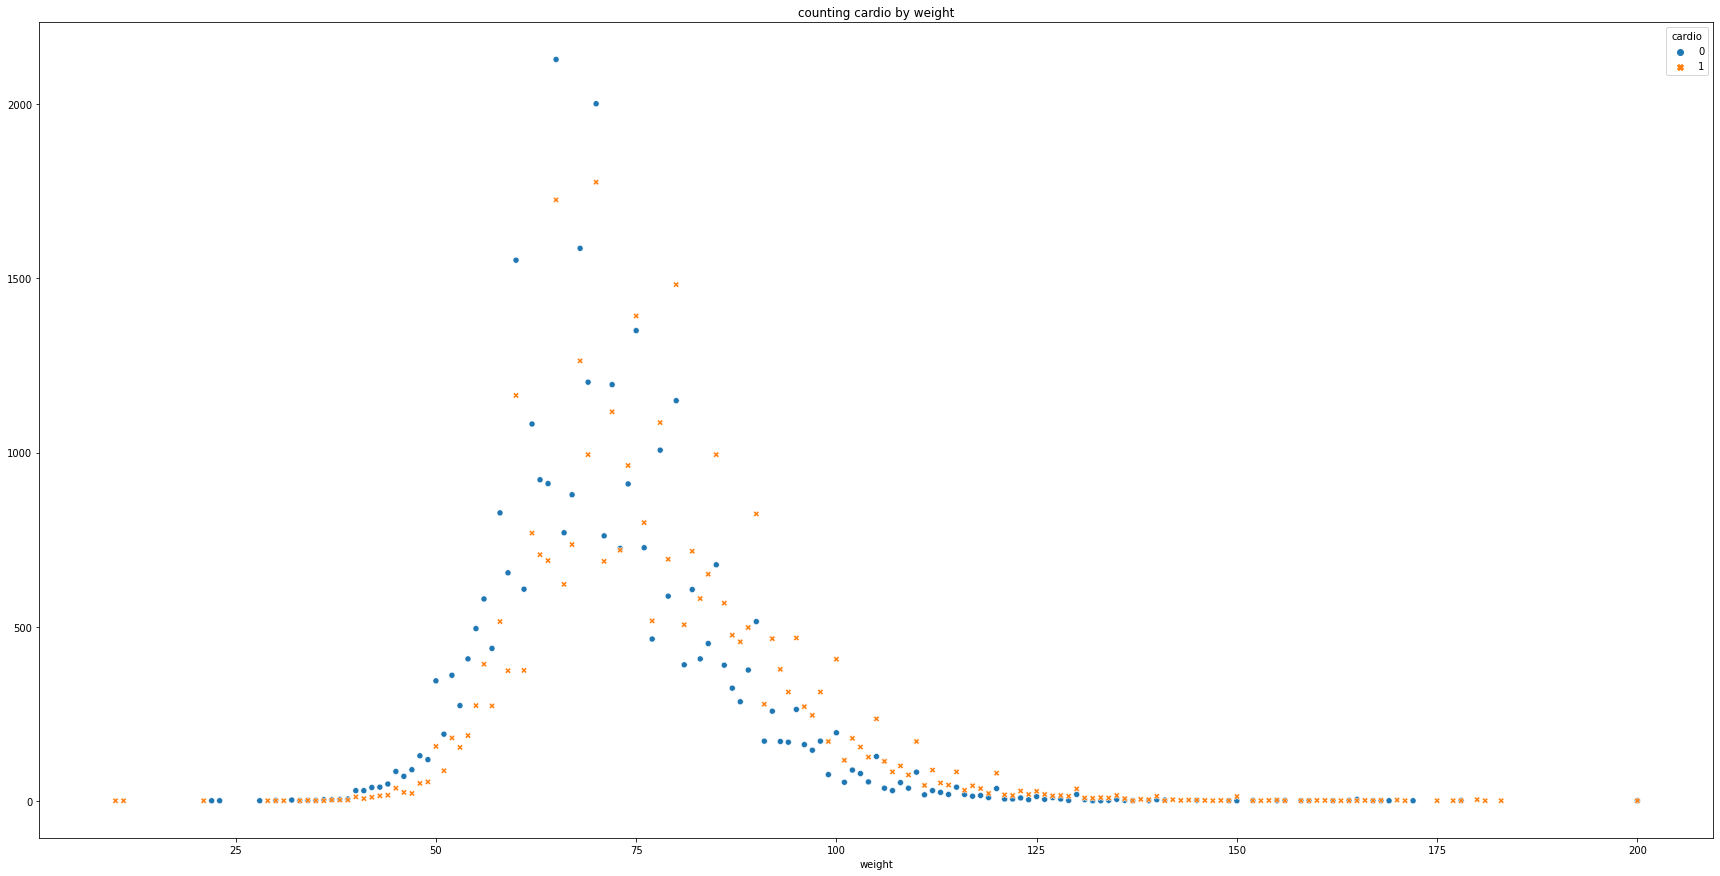

In [26]:
# take weight & round
weight = data.weight
weight = round(weight)

# create weight data in correlation with cardio
weight_data = pd.concat([weight, data.cardio], axis=1, join='inner')

# count all cases for weight and cardio
weight_data['sum'] = 0
plot_data = weight_data.groupby(['weight','cardio'])['sum'].count().unstack()

# plot the results
fig_weight_a, bar_weight_a = plt.subplots(figsize = (60,25))
bar_weight_a = sns.countplot(x='weight',data=weight_data)
bar_weight_a.set_title('counting amount of weight data')

fig_weight_b, bar_weight_b = plt.subplots(figsize = (30,15))
bar_weight_b = sns.scatterplot(data=plot_data)
bar_weight_b.set_title('counting cardio by weight')

### ap_hi - systolic blood pressure

Problem with data???

In [39]:
# create ap_hi data in correlation with cardio
# ap_hi_data = pd.concat([data.ap_hi, data.cardio], axis=1, join='inner')

# count all cases for ap_hi and cardio
# ap_hi_data['sum'] = 0
# plot_data = ap_hi_data.groupby(['ap_hi','cardio'])['sum'].count()

# # plot the results
# fig_ap_hi_a, bar_ap_hi_a = plt.subplots(figsize = (40,15))
# bar_ap_hi_a = sns.countplot(x='ap_hi',data=ap_hi_data)
# bar_ap_hi_a.set_title('counting amount of ap_hi data')
#
# fig_ap_hi_b, bar_ap_hi_b = plt.subplots(figsize = (15,7))
# bar_ap_hi_b = sns.scatterplot(data=plot_data)
# bar_ap_hi_b.set_title('counting cardio by ap_hi')
data.ap_hi.unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

### ap_lo - diastolic blood pressure

Problem with data???

Text(0.5, 1.0, 'counting cardio by ap_lo')

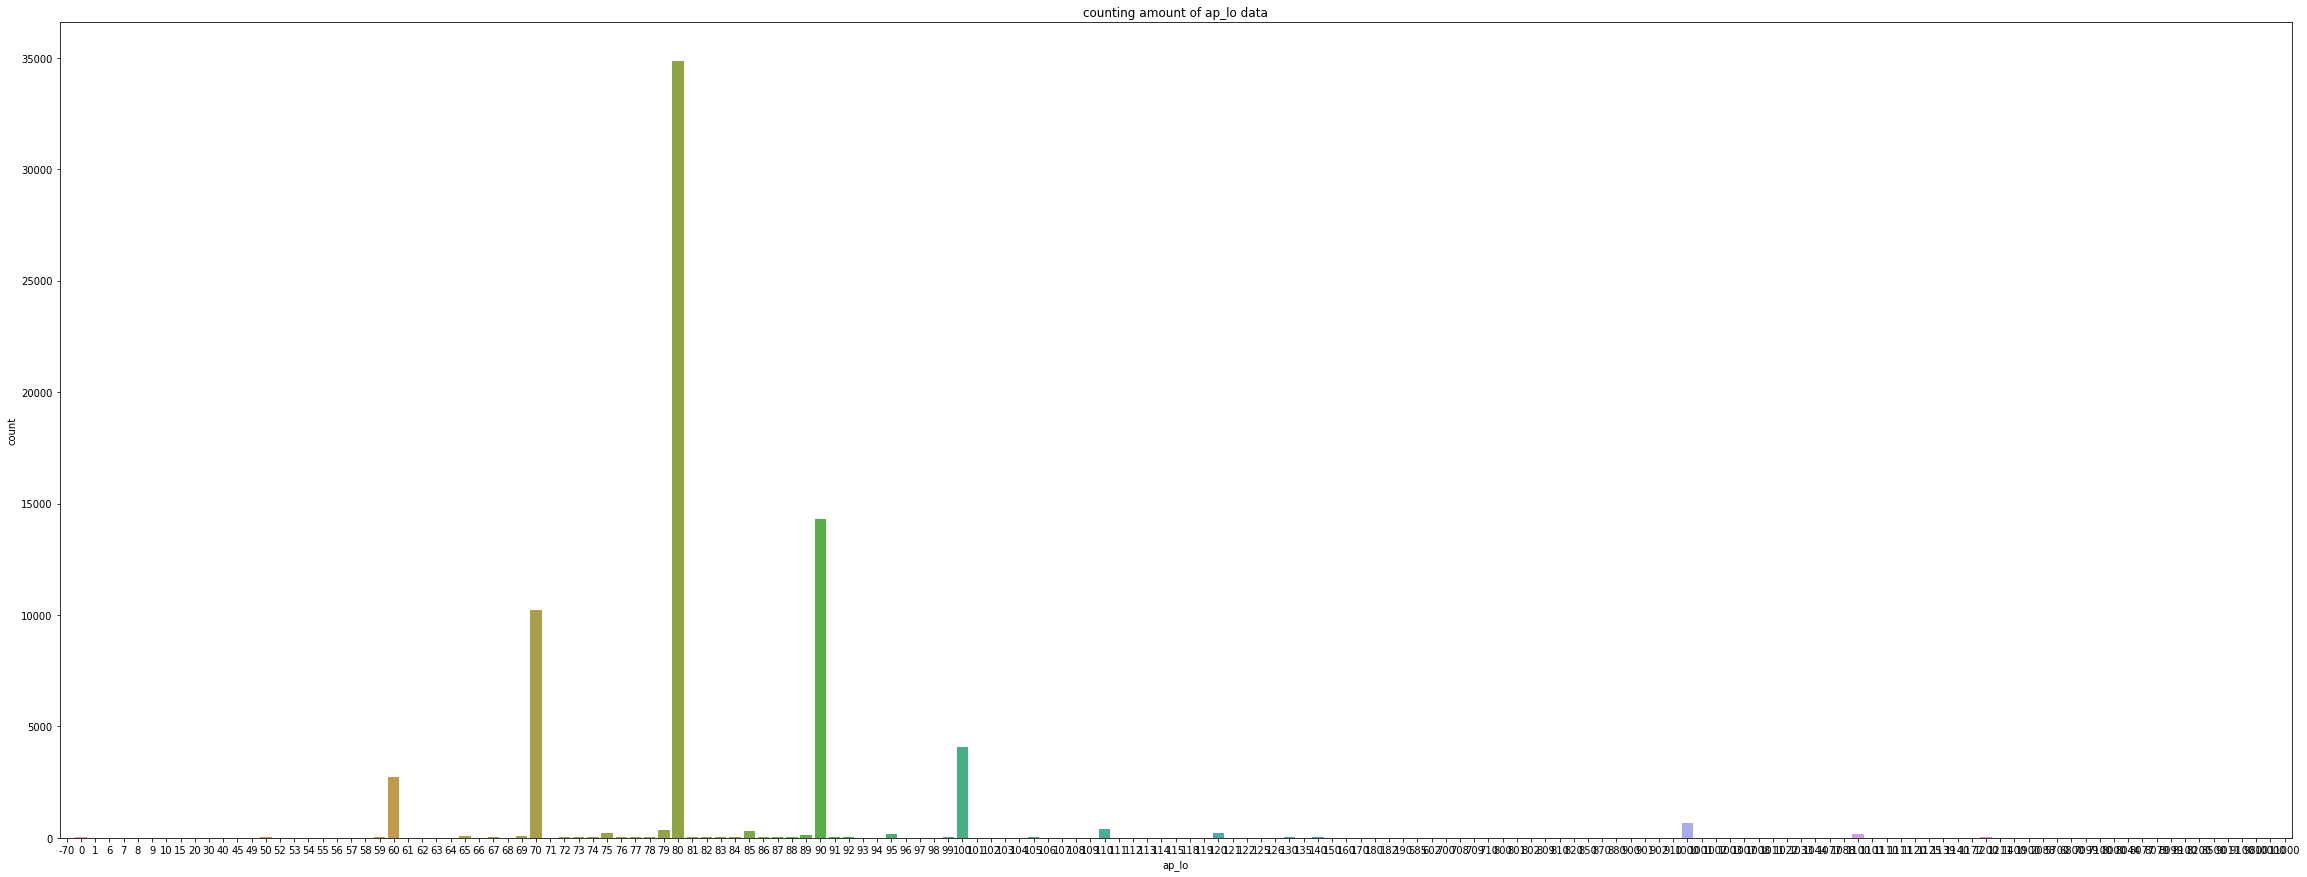

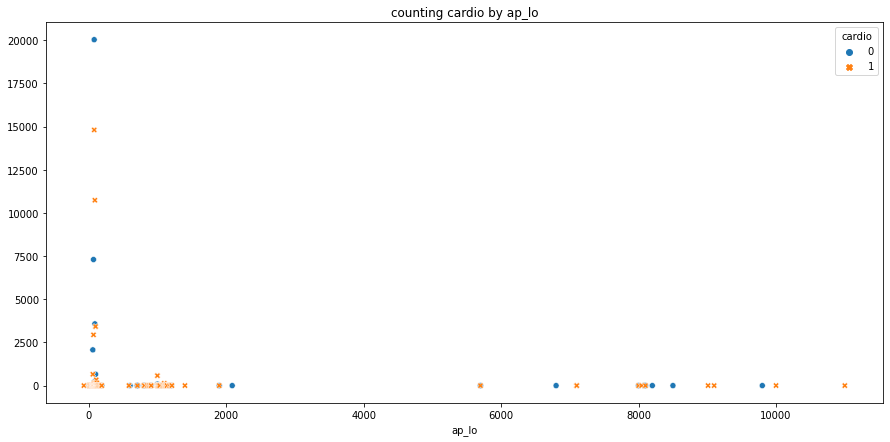

In [34]:
# create ap_lo data in correlation with cardio
# ap_lo_data = pd.concat([data.ap_lo, data.cardio], axis=1, join='inner')
#
# # count all cases for ap_lo and cardio
# ap_lo_data['sum'] = 0
# plot_data = ap_lo_data.groupby(['ap_lo','cardio'])['sum'].count().unstack()
#
# # plot the results
# fig_ap_lo_a, bar_ap_lo_a = plt.subplots(figsize = (40,15))
# bar_ap_lo_a = sns.countplot(x='ap_lo',data=ap_lo_data)
# bar_ap_lo_a.set_title('counting amount of ap_lo data')
#
# fig_ap_lo_b, bar_ap_lo_b = plt.subplots(figsize = (15,7))
# bar_ap_lo_b = sns.scatterplot(data=plot_data)
# bar_ap_lo_b.set_title('counting cardio by ap_lo')
data.ap_hi.unique()


### Cholesterol

Text(0.5, 1.0, 'counting cardio by cholesterol')

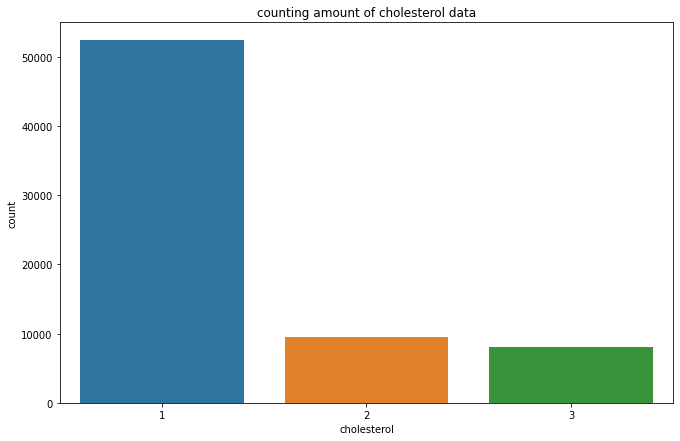

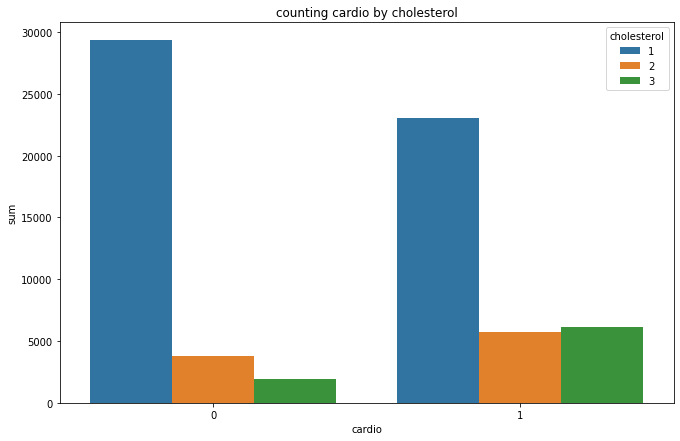

In [27]:
# create cholesterol data in correlation with cardio
cholesterol_data = pd.concat([data.cholesterol, data.cardio], axis=1, join='inner')

# count data and remap cholesterol
cholesterol_data['sum'] = 0
group_data:pd.DataFrame = cholesterol_data.groupby(['cholesterol','cardio'])['sum'].count().unstack()
a, b, c = group_data.values
plot_data = pd.DataFrame({'cholesterol':[1,1,2, 2,3,3], 'cardio':[0,1,0,1,0,1], 'sum':[a[0],a[1], b[0], b[1], c[0],c[1]]})
plot_data

# plot the result
fig_cholesterol_a, bar_cholesterol_a = plt.subplots(figsize = (11,7))
bar_cholesterol_a = sns.countplot(x='cholesterol',data=cholesterol_data)
bar_cholesterol_a.set_title('counting amount of cholesterol data')

fig_cholesterol_b, bar_cholesterol_b = plt.subplots(figsize = (11,7))
bar_cholesterol_b = sns.barplot(x='cardio',y='sum', hue='cholesterol', data=plot_data)
bar_cholesterol_b.set_title('counting cardio by cholesterol')

### Glucose/ Diabetes

Text(0.5, 1.0, 'counting cardio by glucose')

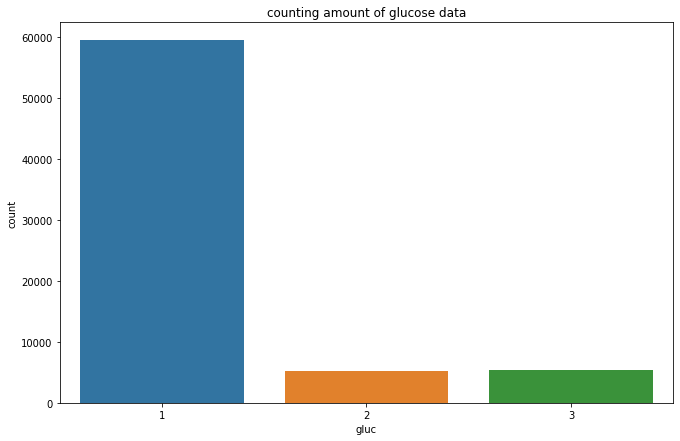

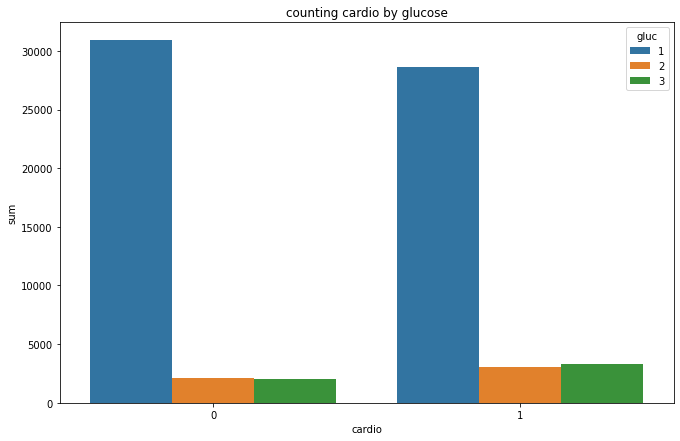

In [28]:
# create glucose data in correlation with cardio
gluc_data = pd.concat([data.gluc, data.cardio], axis=1, join='inner')

# count data and remap glucose level
gluc_data['sum'] = 0
group_data:pd.DataFrame = gluc_data.groupby(['gluc','cardio'])['sum'].count().unstack()
a, b, c = group_data.values
plot_data = pd.DataFrame({'gluc':[1,1,2, 2,3,3], 'cardio':[0,1,0,1,0,1], 'sum':[a[0],a[1], b[0], b[1], c[0],c[1]]})
plot_data

# plot the result
fig_gluc_a, bar_gluc_a = plt.subplots(figsize = (11,7))
bar_gluc_a = sns.countplot(x='gluc',data=gluc_data)
bar_gluc_a.set_title('counting amount of glucose data')

fig_gluc_b, bar_gluc_b = plt.subplots(figsize = (11,7))
bar_gluc_b = sns.barplot(x='cardio',y='sum', hue='gluc', data=plot_data)
bar_gluc_b.set_title('counting cardio by glucose')


### Smoking

Text(0.5, 1.0, 'counting cardio by smoking')

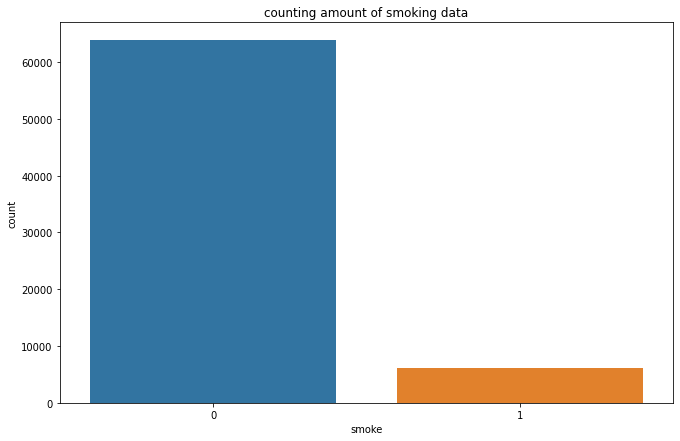

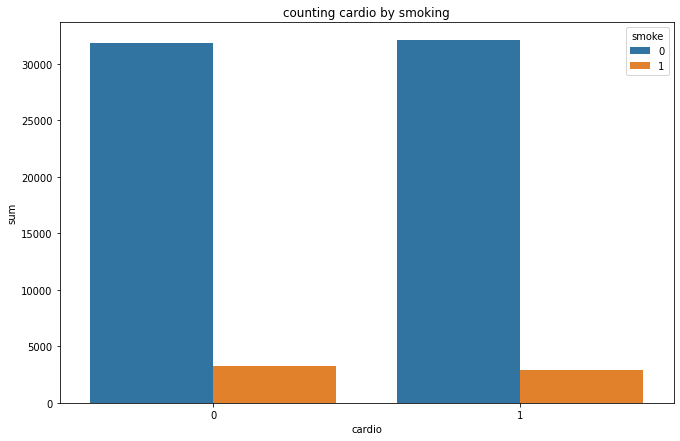

In [30]:
# create smoking data in correlation with cardio
smoke_data = pd.concat([data.smoke, data.cardio], axis=1, join='inner')

# count data and remap smoking
smoke_data['sum'] = 0
group_data:pd.DataFrame = smoke_data.groupby(['smoke','cardio'])['sum'].count().unstack()
a, b = group_data.values
plot_data = pd.DataFrame({'smoke':[0,0,1,1], 'cardio':[0,1,0,1], 'sum':[a[0],a[1], b[0], b[1]]})

# plot the result
fig_smoke_a, bar_smoke_a = plt.subplots(figsize = (11,7))
bar_smoke_a = sns.countplot(x='smoke',data=smoke_data)
bar_smoke_a.set_title('counting amount of smoking data')

fig_smoke_b, bar_smoke_b = plt.subplots(figsize = (11,7))
bar_smoke_b = sns.barplot(x='cardio',y='sum', hue='smoke', data=plot_data)
bar_smoke_b.set_title('counting cardio by smoking')

### Alcohol intake

Text(0.5, 1.0, 'counting cardio by alco')

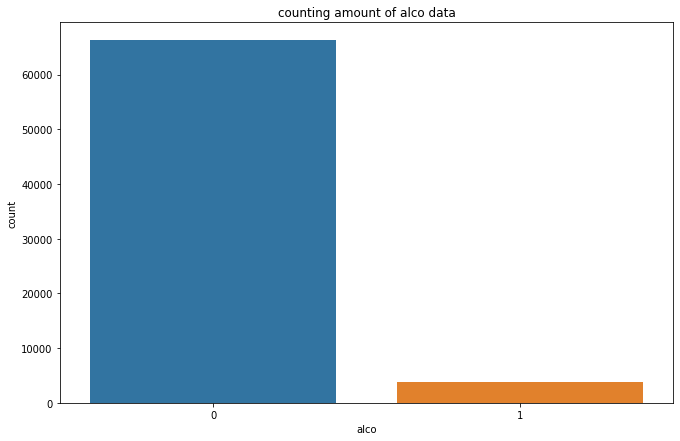

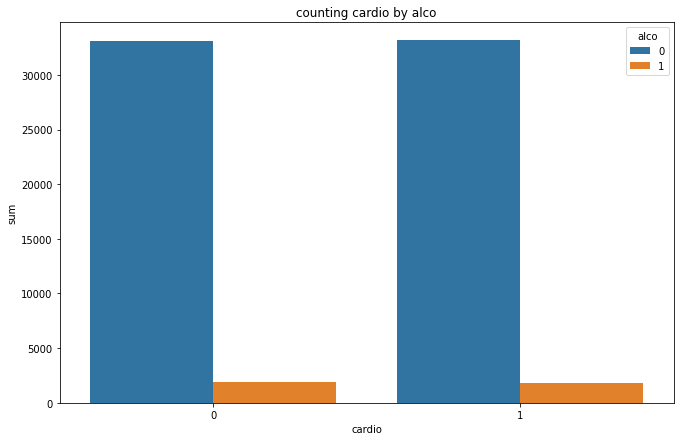

In [31]:
# create alcohol intake data in correlation with cardio
alco_data = pd.concat([data.alco, data.cardio], axis=1, join='inner')

# count data and remap alcohol intake
alco_data['sum'] = 0
group_data:pd.DataFrame = alco_data.groupby(['alco','cardio'])['sum'].count().unstack()
a, b = group_data.values
plot_data = pd.DataFrame({'alco':[0,0,1,1], 'cardio':[0,1,0,1], 'sum':[a[0],a[1], b[0], b[1]]})

# plot the result
fig_alco_a, bar_alco_a = plt.subplots(figsize = (11,7))
bar_alco_a = sns.countplot(x='alco',data=alco_data)
bar_alco_a.set_title('counting amount of alco data')

fig_alco_b, bar_alco_b = plt.subplots(figsize = (11,7))
bar_alco_b = sns.barplot(x='cardio',y='sum', hue='alco', data=plot_data)
bar_alco_b.set_title('counting cardio by alco')

### Physical active

Text(0.5, 1.0, 'counting cardio by active')

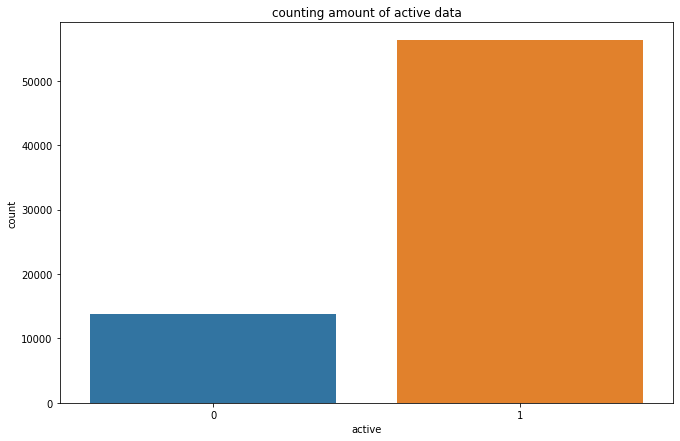

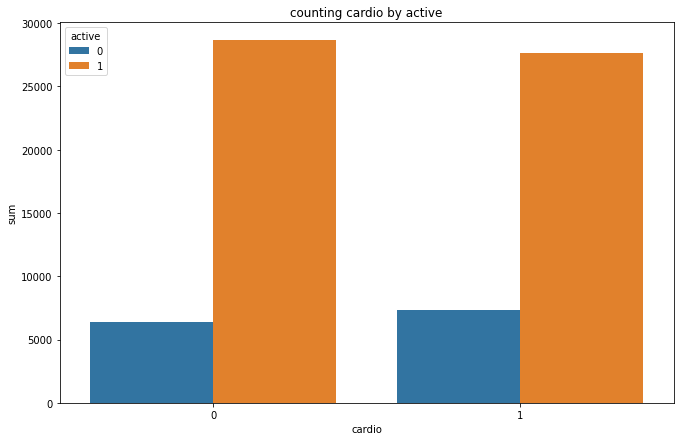

In [32]:
# create psychical activity data in correlation with cardio
active_data = pd.concat([data.active, data.cardio], axis=1, join='inner')

# count data and remap psychical activity
active_data['sum'] = 0
group_data:pd.DataFrame = active_data.groupby(['active','cardio'])['sum'].count().unstack()
a, b = group_data.values
plot_data = pd.DataFrame({'active':[0,0,1,1], 'cardio':[0,1,0,1], 'sum':[a[0],a[1], b[0], b[1]]})

# plot the result
fig_active_a, bar_active_a = plt.subplots(figsize = (11,7))
bar_active_a = sns.countplot(x='active',data=active_data)
bar_active_a.set_title('counting amount of active data')

fig_active_b, bar_active_b = plt.subplots(figsize = (11,7))
bar_active_b = sns.barplot(x='cardio',y='sum', hue='active', data=plot_data)
bar_active_b.set_title('counting cardio by active')